Нейронки для новых данных

используем скалирование для всех данных

# загрузка библиотек и данных и дополнительные функции

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
large = 22; med = 10; small = 7
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (5, 5),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline


<ipython-input-21-e22f9671809d>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
## Импорт библиотеки pandas
import pandas as pd
import numpy as np


# Загрузка базы данных, уже обработанные, но не проскалированные
import gdown

#!gdown --id 1j4rXN3Qo5L6tCeL0zz9PbEnNponXrssQ
#ссылка должна быть вида: https://drive.google.com/uc?id=
gdown.download('https://drive.google.com/uc?id=1sqEEyJPvWCRdliQNhteShL0NU7ykX1cR', None, quiet=True)
#gdown.download('https://docs.google.com/spreadsheets/d/1j4rXN3Qo5L6tCeL0zz9PbEnNponXrssQ/', None, quiet=True)
df = pd.read_csv('df_train_9.csv')#, encoding='cp1250')
#df = pd.read_excel('СПР_0-30000_для нейр.xlsx', sheet_name='Result')#, encoding='utf-8')

df

,Серия,Позиция секции,Позиция КП,"Общий пробег, км",1_Пробег по R < 450 м,1_Пробег по R из [450; 800) м,1_Пробег по R из [800 1200) м,1_Пробег по R >= 1200 м,2_Пробег по R < 450 м,2_Пробег по R из [450; 800) м,...,15_Пробег по R < 450 м,15_Пробег по R из [450; 800) м,15_Пробег по R из [800 1200) м,15_Пробег по R >= 1200 м,16_Пробег по R < 450 м,16_Пробег по R из [450; 800) м,16_Пробег по R из [800 1200) м,16_Пробег по R >= 1200 м,month,Period
0,1.0,1.0,1.0,7561.548,0.012734,0.038293,0.060439,0.869496,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,8.0,357.0
1,1.0,1.0,3.0,7561.548,0.012734,0.038293,0.060439,0.869496,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,8.0,357.0
2,1.0,1.0,6.0,7561.548,0.012734,0.038293,0.060439,0.869496,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,8.0,357.0
3,1.0,2.0,4.0,6309.123,0.013230,0.033880,0.061473,0.888088,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,8.0,319.0
4,1.0,2.0,4.0,2732.223,0.015939,0.079748,0.063143,0.796171,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,6.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26974,24.0,2.0,1.0,90938.125,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.007868,0.011507,0.005724,0.047945,0.0,0.0,0.0,0.0,3.0,170.0
26975,24.0,2.0,1.0,52231.727,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.009101,0.012294,0.005917,0.051416,0.0,0.0,0.0,0.0,5.0,104.0
26976,24.0,2.0,1.0,50634.785,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0,94.0
26977,24.0,2.0,2.0,90938.125,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.007868,0.011507,0.005724,0.047945,0.0,0.0,0.0,0.0,3.0,170.0


In [ ]:
# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential, Model

# Основные слои
from tensorflow.keras.layers import Concatenate, Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Оптимизаторы
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop


# Масштабирование данных
from sklearn.preprocessing import StandardScaler


# Регулярные выражения
import re


# Метрики для расчета ошибок
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
pd.set_option('display.max_columns', 100) #установим отображение не более 100 столбцов


In [ ]:
df_copy=df.copy()


In [ ]:
df=df_copy.copy()

In [ ]:
spr={'1':'МОСКОВСКАЯ', '2': 'ГОРЬКОВСКАЯ', '3':'ОКТЯБРЬСКАЯ', '4':'ДАЛЬНЕВОСТОЧНАЯ', '5':'ЮГО-ВОСТОЧНАЯ',
     '6':'СЕВЕРНАЯ', '7':'КАЛИНИНГРАДСКАЯ', '8':'КУЙБЫШЕВСКАЯ', '9':'ЮЖНО-УРАЛЬСКАЯ', '10': 'СВЕРДЛОВСКАЯ',
     '11':'ЗАБАЙКАЛЬСКАЯ', '12':'КРАСНОЯРСКАЯ','13':'ЗАПАДНО-СИБИРСКАЯ', '14':'ПРИВОЛЖСКАЯ',
     '15':'ВОСТОЧНО-СИБИРСКАЯ', '16':'СЕВЕРО-КАВКАЗСКАЯ'}
#упорядочивание по географическому принципу
spr2={'7':'КАЛИНИНГРАДСКАЯ','3':'ОКТЯБРЬСКАЯ', '6':'СЕВЕРНАЯ','2': 'ГОРЬКОВСКАЯ','1':'МОСКОВСКАЯ','14':'ПРИВОЛЖСКАЯ',
       '16':'СЕВЕРО-КАВКАЗСКАЯ', '8':'КУЙБЫШЕВСКАЯ','9':'ЮЖНО-УРАЛЬСКАЯ','10': 'СВЕРДЛОВСКАЯ',
      '13':'ЗАПАДНО-СИБИРСКАЯ', '12':'КРАСНОЯРСКАЯ','15':'ВОСТОЧНО-СИБИРСКАЯ','11':'ЗАБАЙКАЛЬСКАЯ',
      '5':'ЮГО-ВОСТОЧНАЯ','4':'ДАЛЬНЕВОСТОЧНАЯ'}
num_reg=('7','3','6','2','1','14','16','8','9','10','13', '12','15','11','5','4')

In [ ]:
df.describe()

,Серия,Позиция секции,Позиция КП,"Общий пробег, км",1_Пробег по R < 450 м,1_Пробег по R из [450; 800) м,1_Пробег по R из [800 1200) м,1_Пробег по R >= 1200 м,2_Пробег по R < 450 м,2_Пробег по R из [450; 800) м,...,15_Пробег по R < 450 м,15_Пробег по R из [450; 800) м,15_Пробег по R из [800 1200) м,15_Пробег по R >= 1200 м,16_Пробег по R < 450 м,16_Пробег по R из [450; 800) м,16_Пробег по R из [800 1200) м,16_Пробег по R >= 1200 м,month,Period
count,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,...,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000
mean,12.555024,1.587420,3.265688,36154.982691,0.000603,0.003634,0.003311,0.027428,0.001286,0.008955,...,0.014224,0.005773,0.001984,0.020391,0.009353,0.008026,0.004546,1352.523622,5.856926,133.676230
std,6.429897,0.603649,1.700296,23012.034999,0.003648,0.019041,0.016840,0.138250,0.006952,0.031931,...,0.077347,0.025846,0.009608,0.093175,0.048865,0.029524,0.016707,4814.936213,3.277386,69.920254
min,1.000000,1.000000,1.000000,14.983000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000
25%,7.000000,1.000000,2.000000,16092.198000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,85.000000
50%,14.000000,2.000000,3.000000,33296.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,118.000000
75%,16.000000,2.000000,5.000000,51147.906000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,172.000000
max,24.000000,3.000000,6.000000,99987.266000,0.067553,0.274265,0.172647,0.938727,0.110818,0.296856,...,0.518174,0.239607,0.146687,0.798047,0.378529,0.183121,0.123696,85922.630000,12.000000,364.000000


##Вспомогательные функции

In [ ]:
def check_MAE_predictl_Input (model,
                                    x_data,
                                    y_data,
                                    plot=False):

  x_pred =model.predict(x_data)
  #x_pred = y_scaler.inverse_transform(x_pred.reshape(-1,1)).flatten()
  x_pred=x_pred.reshape(-1,1).flatten()
  mae2 = mean_absolute_error(y_data,x_pred)
#  for n in range (0,len(x_data)):
#      print(f'Верное значение {y_data[n]} - предсказанное {x_pred[n]} в {n} =', abs(y_data[n] - x_pred[n]))
  print('Средняя абсолютная ошибка = ',mae2)
  print('Средний процент ошибки = ', mae2 /y_data.mean()*100, '%')
  plt.scatter(y_data, x_pred)
  plt.xlabel('Правильные значения')
  plt.ylabel('Предсказания')
  plt.axis('equal')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  plt.plot([0, 250], [0, 250])
  plt.show()

In [ ]:
def plot_history_mae(history):
    plt.plot(history.history['mae'],
            label='Средняя абсолютная ошибка на обучающем наборе')
    plt.plot(history.history['val_mae'],
            label='Средняя абсолютная ошибка на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Средняя абсолютная ошибка')
    plt.legend()
    plt.show()

#вариант 1. будем часть данных преобразовывать в ОНЕ, а часть скалировать

## Преобразование в OHE 'Позиция секции', 'Позиция КП',

In [ ]:
print(df['Позиция секции'].unique())

['1' '2' '3']


In [ ]:
df['Позиция секции'].value_counts() #дата сет не сбалансирован

1    14364
2    14057
3     1865
Name: Позиция секции, dtype: int64

In [ ]:
df_Sec=pd.get_dummies(df['Позиция секции'])
df_Sec=df_Sec.rename(columns={'1' : 'Sec1', '2' : 'Sec2', '3': 'Sec3'})
df_Sec


,Sec1,Sec2,Sec3
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
30281,0,1,0
30282,0,1,0
30283,0,1,0
30284,0,1,0


In [ ]:
df['Позиция КП'].value_counts()

1    6325
3    5551
4    5494
2    5311
6    4138
5    3467
Name: Позиция КП, dtype: int64

In [ ]:
df_Poz_KP=pd.get_dummies(df['Позиция КП'])
df_Poz_KP=df_Poz_KP.rename(columns={'1' : 'Poz_KP_1', '2' : 'Poz_KP_2', '3' : 'Poz_KP_3', '4' : 'Poz_KP_4', '5':'Poz_KP_5', '6': 'Poz_KP_6'})
df_Poz_KP

,Poz_KP_1,Poz_KP_2,Poz_KP_3,Poz_KP_4,Poz_KP_5,Poz_KP_6
0,1,0,0,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
30281,1,0,0,0,0,0
30282,1,0,0,0,0,0
30283,0,1,0,0,0,0
30284,0,1,0,0,0,0


In [ ]:
df_copy2=df.copy()

In [ ]:
df=df_copy2.copy()

##Объединяем с ОНЕ

In [ ]:
df_train=df.copy()

In [ ]:
df_train.drop(['Позиция секции', 'Позиция КП'], axis=1, inplace=True)

In [ ]:
df_train2 = pd.concat([df_Poz_KP, df_Sec, df_train], axis = 1)


In [ ]:
df_train2

In [ ]:
df_train2.columns

Index(['Poz_KP_1', 'Poz_KP_2', 'Poz_KP_3', 'Poz_KP_4', 'Poz_KP_5', 'Poz_KP_6',
       'Sec1', 'Sec2', 'Sec3', 'Серия', 'Общий пробег, км',
       '1_Пробег по R < 450 м', '1_Пробег по R из [450; 800) м',
       '1_Пробег по R из [800 1200) м', '1_Пробег по R >= 1200 м',
       '2_Пробег по R < 450 м', '2_Пробег по R из [450; 800) м',
       '2_Пробег по R из [800 1200) м', '2_Пробег по R >= 1200 м',
       '3_Пробег по R < 450 м', '3_Пробег по R из [450; 800) м',
       '3_Пробег по R из [800 1200) м', '3_Пробег по R >= 1200 м',
       '4_Пробег по R < 450 м', '4_Пробег по R из [450; 800) м',
       '4_Пробег по R из [800 1200) м', '4_Пробег по R >= 1200 м',
       '5_Пробег по R < 450 м', '5_Пробег по R из [450; 800) м',
       '5_Пробег по R из [800 1200) м', '5_Пробег по R >= 1200 м',
       '6_Пробег по R < 450 м', '6_Пробег по R из [450; 800) м',
       '6_Пробег по R из [800 1200) м', '6_Пробег по R >= 1200 м',
       '7_Пробег по R < 450 м', '7_Пробег по R из [450; 800) м',
    

##Скалируем остальные ('Серия', Период, 'Общий пробег', 'месяц') по мин-макс

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# создаем объект этого класса,
# в параметре feature_range оставим диапазон по умолчанию
minmax = MinMaxScaler(feature_range = (0, 1))


# выберем те столбцы, которые мы хотим масштабировать
cols_to_scale=['Period', 'Общий пробег, км', 'Серия', 'month']
minmax.fit(df_train2[cols_to_scale])

# найдем минимальные и максимальные значения
minmax.data_min_, minmax.data_max_



(array([ 9.   , 14.983,  1.   ,  1.   ], dtype=float32),
 array([3.6400000e+02, 9.9987266e+04, 2.4000000e+01, 1.2000000e+01],
       dtype=float32))

In [ ]:
df_train_scaled = minmax.transform(df_train2[cols_to_scale])
df_train_scaled = pd.DataFrame(df_train_scaled, columns = cols_to_scale)

In [ ]:
df_train_scaled

,Period,"Общий пробег, км",Серия,month
0,0.980282,0.075487,0.0,0.636364
1,0.980282,0.075487,0.0,0.636364
2,0.980282,0.075487,0.0,0.636364
3,0.873239,0.062959,0.0,0.636364
4,0.177465,0.027180,0.0,0.454545
...,...,...,...,...
26974,0.453521,0.909484,1.0,0.181818
26975,0.267606,0.522312,1.0,0.363636
26976,0.239437,0.506338,1.0,0.090909
26977,0.453521,0.909484,1.0,0.181818


In [ ]:
df_train_scaled.describe()

,Period,"Общий пробег, км",Серия,month
count,26979.000000,26979.000000,26979.000000,26979.000000
mean,0.351201,0.361500,0.502392,0.441539
std,0.196958,0.230184,0.279561,0.297944
min,0.000000,0.000000,0.000000,0.000000
25%,0.214085,0.160817,0.260870,0.181818
50%,0.307042,0.332910,0.565217,0.363636
75%,0.459155,0.511471,0.652174,0.636364
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_train2.drop(cols_to_scale, axis=1, inplace=True)

In [ ]:
df_train2=df_train2.reset_index()


In [ ]:
df_train2.drop(['index'], axis=1, inplace=True)

In [ ]:
df_train22 = pd.concat([df_train_scaled, df_train2], axis = 1)
df_train22

,Period,"Общий пробег, км",Серия,month,Poz_KP_1,Poz_KP_2,Poz_KP_3,Poz_KP_4,Poz_KP_5,Poz_KP_6,Sec1,Sec2,Sec3,1_Пробег по R < 450 м,1_Пробег по R из [450; 800) м,1_Пробег по R из [800 1200) м,1_Пробег по R >= 1200 м,2_Пробег по R < 450 м,2_Пробег по R из [450; 800) м,2_Пробег по R из [800 1200) м,2_Пробег по R >= 1200 м,3_Пробег по R < 450 м,3_Пробег по R из [450; 800) м,3_Пробег по R из [800 1200) м,3_Пробег по R >= 1200 м,4_Пробег по R < 450 м,4_Пробег по R из [450; 800) м,4_Пробег по R из [800 1200) м,4_Пробег по R >= 1200 м,5_Пробег по R < 450 м,5_Пробег по R из [450; 800) м,5_Пробег по R из [800 1200) м,5_Пробег по R >= 1200 м,6_Пробег по R < 450 м,6_Пробег по R из [450; 800) м,6_Пробег по R из [800 1200) м,6_Пробег по R >= 1200 м,7_Пробег по R < 450 м,7_Пробег по R из [450; 800) м,7_Пробег по R из [800 1200) м,7_Пробег по R >= 1200 м,8_Пробег по R < 450 м,8_Пробег по R из [450; 800) м,8_Пробег по R из [800 1200) м,8_Пробег по R >= 1200 м,9_Пробег по R < 450 м,9_Пробег по R из [450; 800) м,9_Пробег по R из [800 1200) м,9_Пробег по R >= 1200 м,10_Пробег по R < 450 м,10_Пробег по R из [450; 800) м,10_Пробег по R из [800 1200) м,10_Пробег по R >= 1200 м,11_Пробег по R < 450 м,11_Пробег по R из [450; 800) м,11_Пробег по R из [800 1200) м,11_Пробег по R >= 1200 м,12_Пробег по R < 450 м,12_Пробег по R из [450; 800) м,12_Пробег по R из [800 1200) м,12_Пробег по R >= 1200 м,13_Пробег по R < 450 м,13_Пробег по R из [450; 800) м,13_Пробег по R из [800 1200) м,13_Пробег по R >= 1200 м,14_Пробег по R < 450 м,14_Пробег по R из [450; 800) м,14_Пробег по R из [800 1200) м,14_Пробег по R >= 1200 м,15_Пробег по R < 450 м,15_Пробег по R из [450; 800) м,15_Пробег по R из [800 1200) м,15_Пробег по R >= 1200 м,16_Пробег по R < 450 м,16_Пробег по R из [450; 800) м,16_Пробег по R из [800 1200) м,16_Пробег по R >= 1200 м
0,0.980282,0.075487,0.0,0.636364,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.012734,0.038293,0.060439,0.869496,0.0,0.0,0.0,0.002779,0.0,0.000139,0.000270,0.015851,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.980282,0.075487,0.0,0.636364,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.012734,0.038293,0.060439,0.869496,0.0,0.0,0.0,0.002779,0.0,0.000139,0.000270,0.015851,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.980282,0.075487,0.0,0.636364,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.012734,0.038293,0.060439,0.869496,0.0,0.0,0.0,0.002779,0.0,0.000139,0.000270,0.015851,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.873239,0.062959,0.0,0.636364,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.013230,0.033880,0.061473,0.888088,0.0,0.0,0.0,0.003330,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.177465,0.027180,0.0,0.454545,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.015939,0.079748,0.063143,0.796171,0.0,0.0,0.0,0.000000,0.0,0.000384,0.000747,0.043868,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0

# вариант 2 скалируем все данные ('Серия', Период, 'Общий пробег', 'месяц', 'Позиция секции', 'Позиция КП') по мин-макс

In [ ]:
#df_train=df.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# создаем объект этого класса,
# в параметре feature_range оставим диапазон по умолчанию
minmax = MinMaxScaler(feature_range = (0, 1))


# выберем те столбцы, которые мы хотим масштабировать
cols_to_scale=['Period', 'Общий пробег, км', 'Серия', 'month','Позиция секции', 'Позиция КП']
minmax.fit(df[cols_to_scale])

# найдем минимальные и максимальные значения
minmax.data_min_, minmax.data_max_
df_train_scaled = minmax.transform(df[cols_to_scale])
df_train_scaled = pd.DataFrame(df_train_scaled, columns = cols_to_scale)
df.drop(cols_to_scale, axis=1, inplace=True)
df=df.reset_index()
df.drop(['index'], axis=1, inplace=True)
df_train22 = pd.concat([df_train_scaled, df], axis = 1)

##выполнение по очереди

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# создаем объект этого класса,
# в параметре feature_range оставим диапазон по умолчанию
minmax = MinMaxScaler(feature_range = (0, 1))


# выберем те столбцы, которые мы хотим масштабировать
cols_to_scale=['Period', 'Общий пробег, км', 'Серия', 'month','Позиция секции', 'Позиция КП']
minmax.fit(df_train[cols_to_scale])

# найдем минимальные и максимальные значения
minmax.data_min_, minmax.data_max_


NameError: ignored

In [ ]:
df_train_scaled = minmax.transform(df_train[cols_to_scale])
df_train_scaled = pd.DataFrame(df_train_scaled, columns = cols_to_scale)

In [ ]:
df_train_scaled

,Period,"Общий пробег, км",Серия,month,Позиция секции,Позиция КП
0,0.980282,0.075487,0.0,0.636364,0.0,0.0
1,0.980282,0.075487,0.0,0.636364,0.0,0.4
2,0.980282,0.075487,0.0,0.636364,0.0,1.0
3,0.873239,0.062959,0.0,0.636364,0.5,0.6
4,0.177465,0.027180,0.0,0.454545,0.5,0.6
...,...,...,...,...,...,...
26974,0.453521,0.909484,1.0,0.181818,0.5,0.0
26975,0.267606,0.522312,1.0,0.363636,0.5,0.0
26976,0.239437,0.506338,1.0,0.090909,0.5,0.0
26977,0.453521,0.909484,1.0,0.181818,0.5,0.2


In [ ]:
df_train_scaled.describe()

,Period,"Общий пробег, км",Серия,month,Позиция секции,Позиция КП
count,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000
mean,0.351201,0.361500,0.502392,0.441539,0.293710,0.453138
std,0.196958,0.230184,0.279561,0.297944,0.301824,0.340059
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214085,0.160817,0.260870,0.181818,0.000000,0.200000
50%,0.307042,0.332910,0.565217,0.363636,0.500000,0.400000
75%,0.459155,0.511471,0.652174,0.636364,0.500000,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_train.drop(cols_to_scale, axis=1, inplace=True)

In [ ]:
df_train=df_train.reset_index()
df_train.drop(['index'], axis=1, inplace=True)


In [ ]:
df_train22 = pd.concat([df_train_scaled, df_train], axis = 1)
df_train22

,Period,"Общий пробег, км",Серия,month,Позиция секции,Позиция КП,1_Пробег по R < 450 м,1_Пробег по R из [450; 800) м,1_Пробег по R из [800 1200) м,1_Пробег по R >= 1200 м,...,14_Пробег по R из [800 1200) м,14_Пробег по R >= 1200 м,15_Пробег по R < 450 м,15_Пробег по R из [450; 800) м,15_Пробег по R из [800 1200) м,15_Пробег по R >= 1200 м,16_Пробег по R < 450 м,16_Пробег по R из [450; 800) м,16_Пробег по R из [800 1200) м,16_Пробег по R >= 1200 м
0,0.980282,0.075487,0.0,0.636364,0.0,0.0,0.012734,0.038293,0.060439,0.869496,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.980282,0.075487,0.0,0.636364,0.0,0.4,0.012734,0.038293,0.060439,0.869496,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.980282,0.075487,0.0,0.636364,0.0,1.0,0.012734,0.038293,0.060439,0.869496,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.873239,0.062959,0.0,0.636364,0.5,0.6,0.013230,0.033880,0.061473,0.888088,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.177465,0.027180,0.0,0.454545,0.5,0.6,0.015939,0.079748,0.063143,0.796171,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26974,0.453521,0.909484,1.0,0.181818,0.5,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.007868,0.011507,0.005724,0.047945,0.0,0.0,0.0,0.0
26975,0.267606,0.522312,1.0,0.363636,0.5,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.009101,0.012294,0.005917,0.051416,0.0,0.0,0.0,0.0
26976,0.239437,0.506338,1.0,0.090909,0.5,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
26977,0.453521,0.909484,1.0,0.181818,0.5,0.2,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.007868,0.011507,0.005724,0.047945,0.0,0.0,0.0,0.0


In [ ]:
stroka=[]
for i in range(1, 17):
  for j in range(1, 5):
      stroka3=str(i)+'_'+str(j)
      stroka.append(stroka3)

df_train22.columns=['Period', 'Probeg', 'Seria', 'month', 	'Poz_KP', 'Poz_Sec']+stroka

##делим на вход и выход

In [ ]:
df_train_x=df_train22.iloc[::, 2:df_train22.shape[1]]
df_train_x

,Серия,month,Позиция секции,Позиция КП,1_Пробег по R < 450 м,1_Пробег по R из [450; 800) м,1_Пробег по R из [800 1200) м,1_Пробег по R >= 1200 м,2_Пробег по R < 450 м,2_Пробег по R из [450; 800) м,...,14_Пробег по R из [800 1200) м,14_Пробег по R >= 1200 м,15_Пробег по R < 450 м,15_Пробег по R из [450; 800) м,15_Пробег по R из [800 1200) м,15_Пробег по R >= 1200 м,16_Пробег по R < 450 м,16_Пробег по R из [450; 800) м,16_Пробег по R из [800 1200) м,16_Пробег по R >= 1200 м
0,0.0,0.636364,0.0,0.0,0.012734,0.038293,0.060439,0.869496,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.636364,0.0,0.4,0.012734,0.038293,0.060439,0.869496,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.636364,0.0,1.0,0.012734,0.038293,0.060439,0.869496,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.636364,0.5,0.6,0.013230,0.033880,0.061473,0.888088,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.454545,0.5,0.6,0.015939,0.079748,0.063143,0.796171,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26974,1.0,0.181818,0.5,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.007868,0.011507,0.005724,0.047945,0.0,0.0,0.0,0.0
26975,1.0,0.363636,0.5,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.009101,0.012294,0.005917,0.051416,0.0,0.0,0.0,0.0
26976,1.0,0.090909,0.5,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
26977,1.0,0.181818,0.5,0.2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.007868,0.011507,0.005724,0.047945,0.0,0.0,0.0,0.0


In [ ]:
Name_Columns2=['Seria', 'month', 	'Poz_KP', 'Poz_Sec']+stroka
df_train_x.columns=Name_Columns2
df_train_x


,Seria,month,Poz_KP,Poz_Sec,1_1,1_2,1_3,1_4,2_1,2_2,...,14_3,14_4,15_1,15_2,15_3,15_4,16_1,16_2,16_3,16_4
0,0.0,0.636364,0.0,0.0,0.012734,0.038293,0.060439,0.869496,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.636364,0.0,0.4,0.012734,0.038293,0.060439,0.869496,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.636364,0.0,1.0,0.012734,0.038293,0.060439,0.869496,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.636364,0.5,0.6,0.013230,0.033880,0.061473,0.888088,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.454545,0.5,0.6,0.015939,0.079748,0.063143,0.796171,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26974,1.0,0.181818,0.5,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.007868,0.011507,0.005724,0.047945,0.0,0.0,0.0,0.0
26975,1.0,0.363636,0.5,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.009101,0.012294,0.005917,0.051416,0.0,0.0,0.0,0.0
26976,1.0,0.090909,0.5,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
26977,1.0,0.181818,0.5,0.2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.007868,0.011507,0.005724,0.047945,0.0,0.0,0.0,0.0


In [ ]:
df_train_y=df_train22.iloc[::, 1]
#df_train_y=df_train_y.astype('float32')

#Формируем данные для обучения

In [ ]:
# Разделение на обучающую и проверочную/тестовую выборку
from sklearn.model_selection import train_test_split
# Библиотека работы с массивами

# Слой задания активационной функции <----- !!!
#from tensorflow.keras.layers import Activation, Conv1D, MaxPooling1D, Flatten, Concatenate, Input

# Утилиты предобработки данных
from tensorflow.keras import utils

# Оптимизаторы
from tensorflow.keras.optimizers import Adam

# Разделение на обучающую и проверочную/тестовую выборку
from sklearn.model_selection import train_test_split


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_train22.iloc[::, 2:df_train22.shape[1]], # набор параметров
                                                    df_train22.iloc[::, 1], # набор меток классов
                                                    test_size=0.2, # процент в тестовую
                                                    shuffle=True, #  перемешивание
                                                    random_state=3) # воспроизводимость

In [ ]:
#сохраним данные в файл


##Второй вариант разделения на тестовые и проверочные: взять все по порядку

In [ ]:
x_train_2=df_train_x.iloc[1001:, ::]
x_test_2=df_train_x.iloc[0:1000, ::]
y_train_2=df_train_y.iloc[1001:]
y_test_2=df_train_y.iloc[0:1000]
y_test_2

0      0.980282
1      0.980282
2      0.980282
3      0.873239
4      0.177465
         ...   
995    0.312676
996    0.242254
997    0.312676
998    0.242254
999    0.357746
Name: Period, Length: 1000, dtype: float32

In [ ]:
y_train

In [ ]:
x_train

#строим модель нейронной сети

In [ ]:
def plot_history_accuracy(history):
    plt.plot(history.history['accuracy'],
            label='Точность на обучающем наборе')
    plt.plot(history.history['val_accuracy'],
            label='Точность на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Точность')
    plt.legend()
    plt.show()

#Модель 1

In [ ]:

model_simple = Sequential()
model_simple.add(BatchNormalization(input_dim=x_train.shape[1]))
model_simple.add(Dense(238, activation='relu'))
model_simple.add(Dense(1000, activation='tanh'))
model_simple.add(Dense(100, activation='relu'))
model_simple.add(Dense(1, activation='linear'))

model_simple.compile(optimizer=Adam(learning_rate=1e-5), loss='mse', metrics=['accuracy'])

history=model_simple.fit(x_train, y_train, epochs=50, batch_size=256, validation_split=0.2, verbose=1)

#plot_history_mae(history)

Epoch 1/50
68/68 [==============================] - 3s 25ms/step - loss: 0.0684 - accuracy: 6.3709e-04 - val_loss: 0.1069 - val_accuracy: 4.6328e-04
Epoch 2/50
68/68 [==============================] - 2s 22ms/step - loss: 0.0417 - accuracy: 6.3709e-04 - val_loss: 0.0885 - val_accuracy: 4.6328e-04
Epoch 3/50
68/68 [==============================] - 1s 22ms/step - loss: 0.0370 - accuracy: 6.3709e-04 - val_loss: 0.0753 - val_accuracy: 4.6328e-04
Epoch 4/50
68/68 [==============================] - 1s 22ms/step - loss: 0.0345 - accuracy: 6.3709e-04 - val_loss: 0.0624 - val_accuracy: 4.6328e-04
Epoch 5/50
68/68 [==============================] - 2s 35ms/step - loss: 0.0331 - accuracy: 6.3709e-04 - val_loss: 0.0513 - val_accuracy: 4.6328e-04
Epoch 6/50
68/68 [==============================] - 2s 31ms/step - loss: 0.0322 - accuracy: 6.9501e-04 - val_loss: 0.0433 - val_accuracy: 4.6328e-04
Epoch 7/50
68/68 [==============================] - 1s 21ms/step - loss: 0.0312 - accuracy: 6.3709e-04 - v

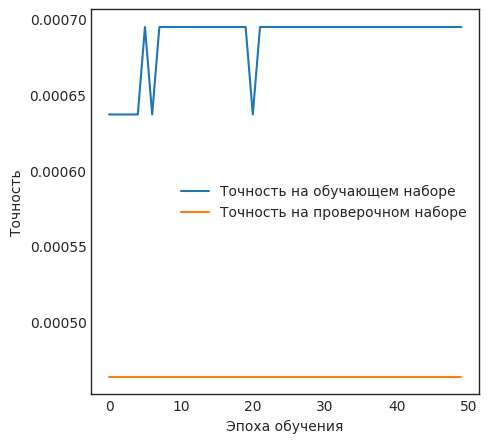

In [ ]:
plot_history_accuracy(history)

#модель2

In [ ]:
model_2 = Sequential()
model_2.add(Dense(2000, input_dim=x_train.shape[1], activation='relu'))
#model_2.add(Dropout(0.3))   #с Дропаутом стало совсем кошмар, ошибка 1,2 - 331% ошибки
model_2.add(Dense(200, activation='relu'))
#model_2.add(Dropout(0.3))
model_2.add(Dense(20, activation='relu'))
#model_2.add(Dropout(0.3))
model_2.add(Dense(1, activation='linear'))

model_2.compile(optimizer=Adam(learning_rate=1e-5), loss='mse', metrics=['accuracy'])

history_2 = model_2.fit(x_train,
                    y_train,
                    epochs=50,
                    batch_size=256,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/50
68/68 [==============================] - 3s 29ms/step - loss: 602.2057 - accuracy: 6.3709e-04 - val_loss: 0.8580 - val_accuracy: 4.6328e-04
Epoch 2/50
68/68 [==============================] - 2s 31ms/step - loss: 0.1565 - accuracy: 6.3709e-04 - val_loss: 0.0954 - val_accuracy: 4.6328e-04
Epoch 3/50
68/68 [==============================] - 3s 45ms/step - loss: 0.0833 - accuracy: 6.3709e-04 - val_loss: 0.0829 - val_accuracy: 4.6328e-04
Epoch 4/50
68/68 [==============================] - 2s 27ms/step - loss: 0.0997 - accuracy: 6.3709e-04 - val_loss: 0.1700 - val_accuracy: 4.6328e-04
Epoch 5/50
68/68 [==============================] - 2s 26ms/step - loss: 0.0726 - accuracy: 6.3709e-04 - val_loss: 0.0557 - val_accuracy: 4.6328e-04
Epoch 6/50
68/68 [==============================] - 2s 26ms/step - loss: 0.0557 - accuracy: 6.3709e-04 - val_loss: 0.0536 - val_accuracy: 4.6328e-04
Epoch 7/50
68/68 [==============================] - 2s 27ms/step - loss: 0.0558 - accuracy: 6.3709e-04 -

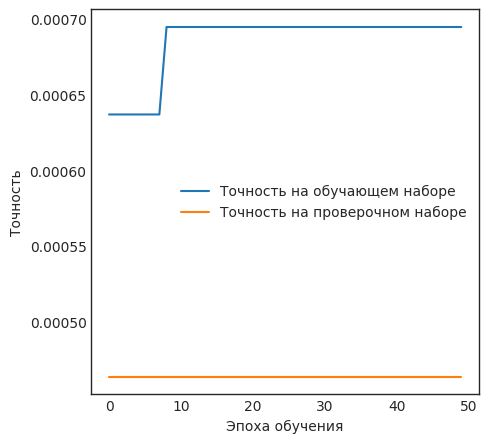

In [ ]:
plot_history_accuracy(history_2)

In [ ]:
#plot_history_mae(history)

#Тестируем модели

In [ ]:
scores = model_simple.evaluate(x_test,
                        y_test,
                        verbose=1
                        )

169/169 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 9.2661e-04


In [ ]:
print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')

Процент верных ответов на тестовых данных: 0.0 %


169/169 [==============================] - 1s 3ms/step
Средняя абсолютная ошибка =  0.11509870297407696
Средний процент ошибки =  31.469806841032238 %


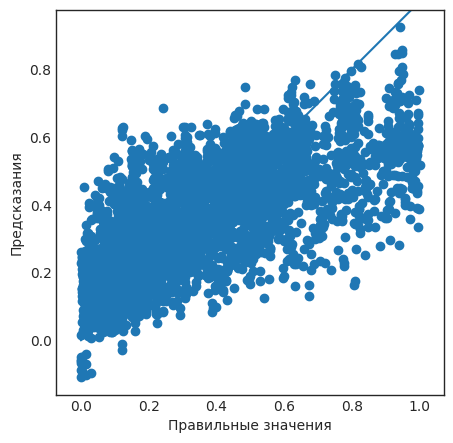

In [ ]:
check_MAE_predictl_Input(model_simple, x_test, y_test, True)

In [ ]:
scores = model_2.evaluate(x_test,
                        y_test,
                        verbose=1
                        )

169/169 [==============================] - 1s 5ms/step - loss: 0.0763 - accuracy: 9.2661e-04


In [ ]:
print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')

Процент верных ответов на тестовых данных: 0.0 %


169/169 [==============================] - 1s 3ms/step
Средняя абсолютная ошибка =  0.17970883991635267
Средний процент ошибки =  49.13524074261147 %


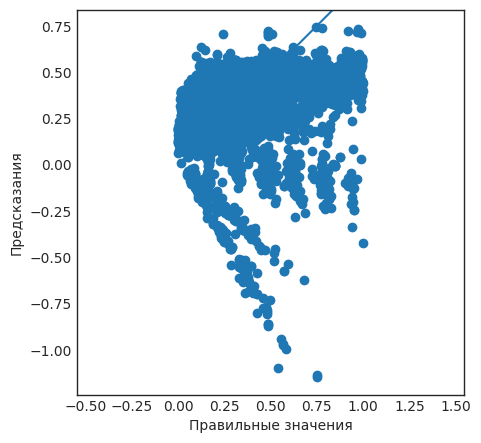

In [ ]:
check_MAE_predictl_Input(model_2, x_test, y_test, True)

#Модель 3 совсем простая

In [ ]:
model_3 = Sequential()
model_3.add(Dense(600, input_dim=x_train.shape[1], activation='relu'))
model_3.add(Dropout(0.3))
#model_3.add(Dense(200, activation='linear'))
#model_3.add(Dense(20, activation='linear'))
model_3.add(Dense(1, activation='relu'))
model_3.add(Dropout(0.3))
model_3.compile(optimizer=Adam(learning_rate=1e-3), loss='mae', metrics=['accuracy'])

history_3 = model_3.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=1000,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/20
18/18 [==============================] - 1s 25ms/step - loss: 8.3873 - accuracy: 6.3709e-04 - val_loss: 0.1998 - val_accuracy: 4.6328e-04
Epoch 2/20
18/18 [==============================] - 0s 16ms/step - loss: 0.2332 - accuracy: 6.3709e-04 - val_loss: 0.1951 - val_accuracy: 4.6328e-04
Epoch 3/20
18/18 [==============================] - 0s 15ms/step - loss: 0.2296 - accuracy: 6.3709e-04 - val_loss: 0.2012 - val_accuracy: 4.6328e-04
Epoch 4/20
18/18 [==============================] - 0s 15ms/step - loss: 0.2297 - accuracy: 6.9501e-04 - val_loss: 0.1942 - val_accuracy: 4.6328e-04
Epoch 5/20
18/18 [==============================] - 0s 16ms/step - loss: 0.2266 - accuracy: 6.9501e-04 - val_loss: 0.1934 - val_accuracy: 4.6328e-04
Epoch 6/20
18/18 [==============================] - 0s 16ms/step - loss: 0.2260 - accuracy: 6.9501e-04 - val_loss: 0.1947 - val_accuracy: 4.6328e-04
Epoch 7/20
18/18 [==============================] - 0s 15ms/step - loss: 0.2243 - accuracy: 6.3709e-04 - v

больше точности не получается

#Модель Максима

In [ ]:
#Модель 4
# Колбэки
from keras.callbacks import  ReduceLROnPlateau,  EarlyStopping , ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor='val_loss',
                        min_delta=0,
                        patience=10,
                        verbose=1,
                        baseline=None,
                        restore_best_weights=True),
    ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5',
                              monitor='val_loss',
                              verbose=1,
                              save_best_only=True,
                              mode='min',
                              baseline=None,
                              initial_value_threshold=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.6, patience=2, verbose=1)
]
def compare_sharp_loss (history, x_size, y_size):
  plt.figure(figsize=(x_size,y_size))
  plt.plot(history.history['loss'],
         label='Ошибка на обучающей выборке')
  plt.plot(history.history['val_loss'],
         label='Ошибка проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Средняя ошибка')
  plt.legend()
  plt.show()

In [ ]:
#Сама нейронка LeakyReLU, ELU
model_4 = Sequential([

    Dense(650, activation='LeakyReLU'),
#    BatchNormalization(),
    Dropout(0.3),
    Dense(2000, activation='LeakyReLU'),
#    BatchNormalization(),
    Dropout(0.3),
    Dense(5000, activation='LeakyReLU'),
#    BatchNormalization(),
    Dropout(0.3),
    Dense(650, activation='LeakyReLU'),
#    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='linear'),
    ])

Epoch 1/20
18/18 [==============================] - ETA: 0s - loss: 173.7949 - accuracy: 6.9501e-04
Epoch 1: val_loss did not improve from 0.24208
18/18 [==============================] - 38s 2s/step - loss: 173.7949 - accuracy: 6.9501e-04 - val_loss: 39.0699 - val_accuracy: 4.6328e-04 - lr: 0.0010
Epoch 2/20
18/18 [==============================] - ETA: 0s - loss: 31.0769 - accuracy: 6.3709e-04
Epoch 2: val_loss did not improve from 0.24208
18/18 [==============================] - 39s 2s/step - loss: 31.0769 - accuracy: 6.3709e-04 - val_loss: 7.0247 - val_accuracy: 4.6328e-04 - lr: 0.0010
Epoch 3/20
18/18 [==============================] - ETA: 0s - loss: 6.5263 - accuracy: 6.3709e-04
Epoch 3: val_loss did not improve from 0.24208
18/18 [==============================] - 37s 2s/step - loss: 6.5263 - accuracy: 6.3709e-04 - val_loss: 4.7258 - val_accuracy: 4.6328e-04 - lr: 0.0010
Epoch 4/20
18/18 [==============================] - ETA: 0s - loss: 2.6118 - accuracy: 6.3709e-04
Epoch 4: v

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - 36s 2s/step - loss: 1.2321 - accuracy: 6.3709e-04 - val_loss: 0.2063 - val_accuracy: 4.6328e-04 - lr: 6.0000e-04
Epoch 11/20
18/18 [==============================] - ETA: 0s - loss: 1.2578 - accuracy: 6.3709e-04
Epoch 11: val_loss did not improve from 0.20626
18/18 [==============================] - 36s 2s/step - loss: 1.2578 - accuracy: 6.3709e-04 - val_loss: 0.4854 - val_accuracy: 4.6328e-04 - lr: 6.0000e-04
Epoch 12/20
18/18 [==============================] - ETA: 0s - loss: 1.1949 - accuracy: 6.9501e-04
Epoch 12: val_loss did not improve from 0.20626

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0003600000170990825.
18/18 [==============================] - 39s 2s/step - loss: 1.1949 - accuracy: 6.9501e-04 - val_loss: 0.2870 - val_accuracy: 4.6328e-04 - lr: 6.0000e-04
Epoch 13/20
18/18 [==============================] - ETA: 0s - loss: 1.1019 - accuracy: 6.9501e-04
Epoch 13: val_loss did not improve from 0.20626
18/18 [============

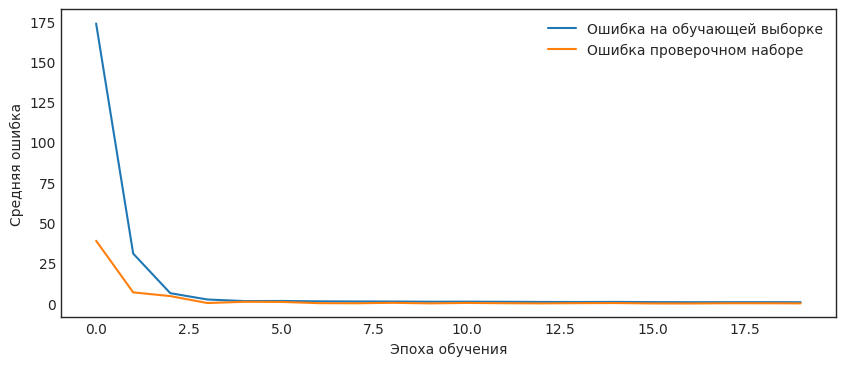

In [ ]:
model_4.compile(optimizer=Adam(learning_rate=1e-3), loss='mae', metrics=['accuracy'])
history_4 = model_4.fit(x_train, y_train, epochs=20,batch_size=1000, validation_split=0.2, shuffle=True, verbose=1, callbacks=my_callbacks)
compare_sharp_loss(history_4,10,4)

#Тестируем модели

In [ ]:
scores = model_4.evaluate(x_test,
                        y_test,
                        verbose=1
                        )
print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')

169/169 [==============================] - 7s 44ms/step - loss: 0.2044 - accuracy: 9.2661e-04
Процент верных ответов на тестовых данных: 0.0 %


169/169 [==============================] - 7s 40ms/step
Средняя абсолютная ошибка =  0.20439376
Средний процент ошибки =  55.88448643684387 %


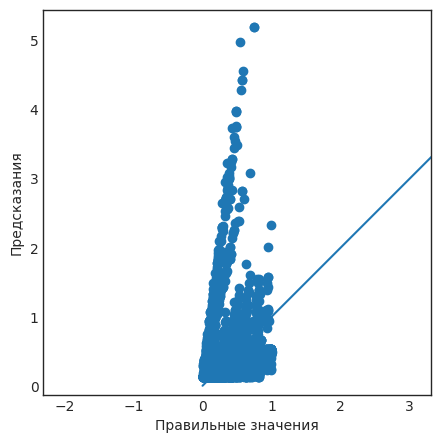

In [ ]:
check_MAE_predictl_Input(model_4, x_test, y_test, True)

In [ ]:
scores = model_3.evaluate(x_test,
                        y_test,
                        verbose=1
                        )
print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')

169/169 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 9.2661e-04
Процент верных ответов на тестовых данных: 0.0 %


169/169 [==============================] - 0s 1ms/step
Средняя абсолютная ошибка =  0.15858687
Средний процент ошибки =  43.360161781311035 %


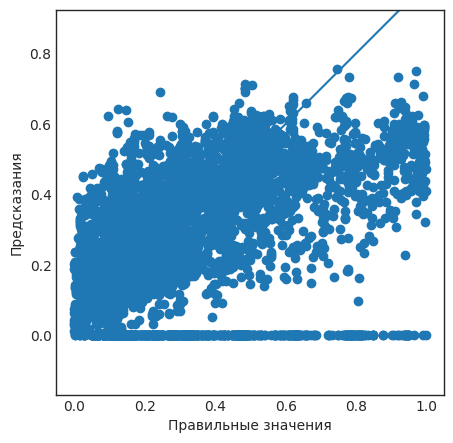

In [ ]:
check_MAE_predictl_Input(model_3, x_test, y_test, True)

# Использование сверточной сети

##Сверточная сеть на все данные, включая направления:
  

In [ ]:
#изменяем размерность для передачи в сверточный слой
x_train_in_23 = np.expand_dims(x_train.iloc[::, 4:68], axis=2)
x_train_in_23.shape

(21583, 64, 1)

In [ ]:
#только сверточная сеть
model = Sequential([
    Conv1D(32, (4), padding='same', activation='relu', input_shape=(68, 1)),
    MaxPooling1D((2), strides=1),
    #Conv1D(64, (17), padding='same', activation='relu'),
    #MaxPooling1D((2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1,  activation='linear')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-5), loss='mse', metrics=['accuracy'])

In [ ]:

history_sver=model.fit(x_train_in_23, y_train, epochs=20, batch_size=256, validation_split=0.2, verbose=1)

Epoch 1/20
68/68 [==============================] - 5s 37ms/step - loss: 27.8268 - accuracy: 6.3709e-04 - val_loss: 0.4525 - val_accuracy: 4.6328e-04
Epoch 2/20
68/68 [==============================] - 2s 30ms/step - loss: 0.1837 - accuracy: 6.3709e-04 - val_loss: 0.1221 - val_accuracy: 4.6328e-04
Epoch 3/20
68/68 [==============================] - 2s 30ms/step - loss: 0.1103 - accuracy: 6.3709e-04 - val_loss: 0.0962 - val_accuracy: 4.6328e-04
Epoch 4/20
68/68 [==============================] - 2s 30ms/step - loss: 0.0860 - accuracy: 6.3709e-04 - val_loss: 0.0740 - val_accuracy: 4.6328e-04
Epoch 5/20
68/68 [==============================] - 2s 27ms/step - loss: 0.0684 - accuracy: 6.3709e-04 - val_loss: 0.0653 - val_accuracy: 4.6328e-04
Epoch 6/20
68/68 [==============================] - 3s 46ms/step - loss: 0.0577 - accuracy: 6.3709e-04 - val_loss: 0.0542 - val_accuracy: 4.6328e-04
Epoch 7/20
68/68 [==============================] - 2s 35ms/step - loss: 0.0532 - accuracy: 6.3709e-04 - 

In [ ]:
x_test_in_23 = np.expand_dims(x_test, axis=2)

In [ ]:
scores = model.evaluate(x_test_in_23,
                        y_test,
                        verbose=1
                        )
print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')

169/169 [==============================] - 1s 3ms/step - loss: 0.0431 - accuracy: 9.2661e-04
Процент верных ответов на тестовых данных: 0.0 %


169/169 [==============================] - 2s 7ms/step
Средняя абсолютная ошибка =  0.16209047369638152
Средний процент ошибки =  44.31810060575056 %


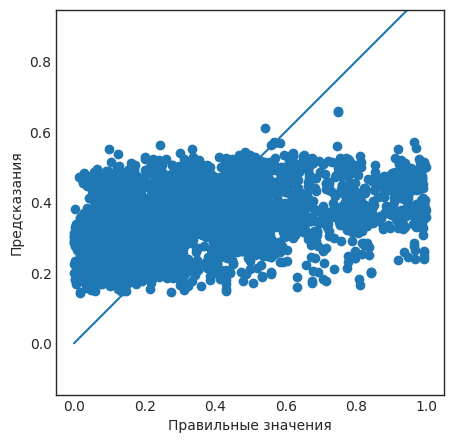

In [ ]:
check_MAE_predictl_Input(model, x_test_in_23, y_test, True)

##Сеть с 2 входами: 1 для данных, 2 для сверточной сети по направлениям

In [ ]:
#1 вход по направлениям
x_train_in_1=x_train.iloc[::, 4:68]
x_train_in_1

,1_Пробег по R < 450 м,1_Пробег по R из [450; 800) м,1_Пробег по R из [800 1200) м,1_Пробег по R >= 1200 м,2_Пробег по R < 450 м,2_Пробег по R из [450; 800) м,2_Пробег по R из [800 1200) м,2_Пробег по R >= 1200 м,3_Пробег по R < 450 м,3_Пробег по R из [450; 800) м,...,14_Пробег по R из [800 1200) м,14_Пробег по R >= 1200 м,15_Пробег по R < 450 м,15_Пробег по R из [450; 800) м,15_Пробег по R из [800 1200) м,15_Пробег по R >= 1200 м,16_Пробег по R < 450 м,16_Пробег по R из [450; 800) м,16_Пробег по R из [800 1200) м,16_Пробег по R >= 1200 м
8097,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
1582,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
20169,0.0,0.00000,0.000000,0.000335,0.000036,0.004575,0.003710,0.043763,0.028510,0.186536,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
26181,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.495937,0.131419,0.024477,0.348167,0.000000,0.000000,0.000000,0.000
13744,0.0,0.00000,0.000000,0.000000,0.040358,0.089960,0.083541,0.530139,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15288,0.0,0.00000,0.000000,0.000000,0.001564,0.019477,0.018957,0.120583,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
26243,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.503228,0.129691,0.023723,0.343358,0.000000,0.000000,0.000000,0.000
11513,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.058015,0.685714,0.000000,0.000000,0.000000,0.000000,0.000621,0.023906,0.010583,3542.772
1688,0.0,0.00000,0.000000,0.000000,0.006861,0.206525,0.158566,0.616850,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000


In [ ]:
#2 вход по свойствам
x_train_in_2 = x_train.iloc[::, 0:4]
x_train_in_2

,Серия,month,Позиция секции,Позиция КП
8097,0.304348,0.272727,0.0,1.0
1582,0.086957,0.181818,0.0,0.0
20169,0.652174,0.181818,0.5,0.4
26181,1.000000,0.363636,0.5,0.2
13744,0.565217,0.000000,0.0,0.8
...,...,...,...,...
15288,0.565217,0.727273,0.5,0.0
26243,1.000000,0.454545,1.0,0.4
11513,0.565217,0.000000,0.0,0.4
1688,0.086957,1.000000,0.5,0.6


In [ ]:
#подгоняем размерность под сверточный слой
x_train_in_23 = np.expand_dims(x_train_in_1, axis=2)

In [ ]:
#делим и подгоняем размерность тестовых данные для 2 входов
x_test_in_2 = x_test.iloc[::, 0:4]
x_test_in_23 = np.expand_dims(x_test.iloc[::, 4:68], axis=2)

(None, 1)


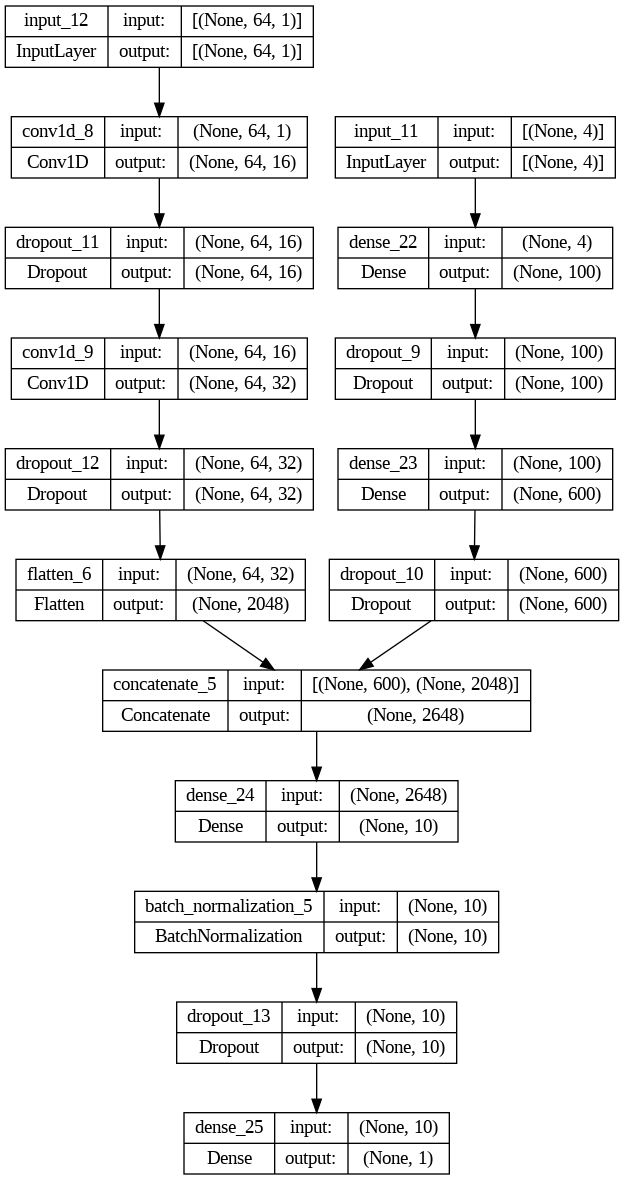

In [ ]:
input1 = Input((x_train_in_2.shape[1]))
input2 = Input((64, 1)) #

x1 = Dense(100, activation='LeakyReLU')(input1)
#x1 = BatchNormalization()(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(600, activation='LeakyReLU')(x1)
#x1 = BatchNormalization()(x1)
x1 = Dropout(0.3)(x1)
#x1 = Dense(2000, activation='sigmoid') (x1)

x3 = Conv1D(16, 4, padding='same', activation='LeakyReLU')(input2) #input_shape=(, 28, 1)
x3 = Dropout(0.3)(x3)
x3 = Conv1D(32, 17, padding='same', activation='LeakyReLU')(x3)
#x3 = BatchNormalization()(x3)
x3 = Dropout(0.3)(x3)
#x3 = MaxPooling1D(4)(x3)
### Два слоя одномерной свертки Conv1D
##model_Conv_1.add(Conv1D(20, 5, activation='relu', padding='same'))
##model_Conv_1.add(Conv1D(20, 5, activation='relu'))
### Слой подвыборки/пулинга с функцией максимума
##model_Conv_1.add(MaxPooling1D(2))
##model_Conv_1.add(Dropout(0.2))
##model_Conv_1.add(BatchNormalization())
##model_Conv_1.add(Flatten())
#x3 = Conv1D(24, 3, padding = 'same',activation='sigmoid')(x3)
#x3 = Conv1D(128, 3, padding = 'same',activation='sigmoid')(x3)
#x3 = BatchNormalization()(x3)
#x3 = Dropout(0.3)(x3)
#x3 = MaxPooling1D()(x3)
x3 = Flatten()(x3)
#x3 = Dense(2000, activation='LeakyReLU') (x3)

x = Concatenate(axis=1)([x1, x3])

x = Dense(10, activation='LeakyReLU')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
#x = Dense(2000, activation='sigmoid')(x)
out = Dense(1, activation='LeakyReLU')(x)

model_5 = Model((input1,input2), out)
model_5.compile(optimizer=Adam(learning_rate=0.00001), loss='MAE', metrics=['accuracy'])

print(out.shape)

utils.plot_model(model_5, show_shapes=True)

In [ ]:
history_sver_2=model_5.fit([x_train_in_2, x_train_in_23], y_train, epochs=20, batch_size=256, validation_split=0.2, verbose=1)

Epoch 1/20
68/68 [==============================] - 24s 96ms/step - loss: 0.5003 - accuracy: 6.3709e-04 - val_loss: 0.3905 - val_accuracy: 4.6328e-04
Epoch 2/20
68/68 [==============================] - 6s 88ms/step - loss: 0.3787 - accuracy: 6.3709e-04 - val_loss: 0.3582 - val_accuracy: 4.6328e-04
Epoch 3/20
68/68 [==============================] - 8s 120ms/step - loss: 0.3589 - accuracy: 6.3709e-04 - val_loss: 0.3253 - val_accuracy: 4.6328e-04
Epoch 4/20
68/68 [==============================] - 6s 84ms/step - loss: 0.3501 - accuracy: 5.2126e-04 - val_loss: 0.3008 - val_accuracy: 4.6328e-04
Epoch 5/20
68/68 [==============================] - 8s 114ms/step - loss: 0.3472 - accuracy: 5.2126e-04 - val_loss: 0.2947 - val_accuracy: 4.6328e-04
Epoch 6/20
68/68 [==============================] - 5s 67ms/step - loss: 0.3440 - accuracy: 4.0542e-04 - val_loss: 0.2850 - val_accuracy: 4.6328e-04
Epoch 7/20
68/68 [==============================] - 7s 103ms/step - loss: 0.3429 - accuracy: 5.7917e-04

In [ ]:
scores = model_5.evaluate([x_test_in_2, x_test_in_23],
                        y_test,
                        verbose=1
                        )
print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')

169/169 [==============================] - 1s 5ms/step - loss: 0.2597 - accuracy: 9.2661e-04
Процент верных ответов на тестовых данных: 0.0 %


169/169 [==============================] - 1s 4ms/step
Средняя абсолютная ошибка =  0.25974792222560267
Средний процент ошибки =  71.0191924720491 %


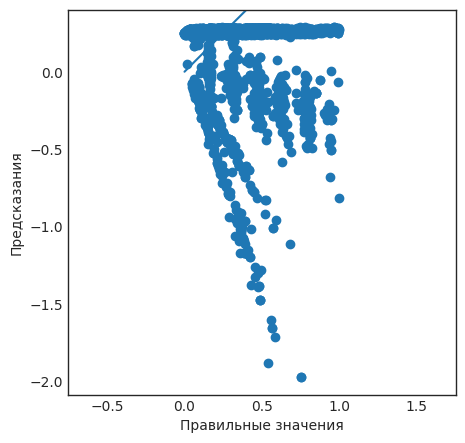

In [ ]:
check_MAE_predictl_Input(model_5, [x_test_in_2, x_test_in_23], y_test, True)

использование сверточной сети не улучшило точность, а увеличило процент ошибки

# Выводы: победил Модель 1 (model_simple) - средняя ошибка 0,11 (для скалированных данных), средний процент ошибки - 31,7%